In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import time
from datetime import datetime, timedelta
from time import mktime

/Users/raymondfeng/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('ignition_data_9_21.csv')
data['pub_date_struct'] = data.apply(lambda x: time.strptime(x['pub_date'],"%Y-%m-%d %H:%M:%S.%f%z"),axis=1)
data.index = data.apply(lambda x: datetime.fromtimestamp(mktime(x['pub_date_struct'])),axis=1)
# a = (2020,9,19,4,25)
# b = (2020,9,19,7,20)
# data = data[(data.index < datetime(*a)) | (data.index > datetime(*b))]
data['hour'] = data.apply(lambda x: str(time.strptime(x['pub_date'],"%Y-%m-%d %H:%M:%S.%f%z")[3]), axis=1)
data['day_of_week'] = data.index.map(lambda x: x.weekday())
hour_dummies = pd.get_dummies(data['hour'], drop_first=True)
hour_dummies.columns = ['h'+ elem for elem in hour_dummies.columns]
day_of_week_dummies = pd.get_dummies(data['day_of_week'], drop_first=True)
day_of_week_dummies.columns = ['dow'+str(elem) for elem in day_of_week_dummies.columns]
print(hour_dummies.columns)
print(day_of_week_dummies.columns)
data = pd.concat((data,hour_dummies,day_of_week_dummies), axis=1)
data.head()
len(data)

Index(['h1', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18',
       'h19', 'h2', 'h20', 'h21', 'h22', 'h23', 'h3', 'h4', 'h5', 'h6', 'h7',
       'h8', 'h9'],
      dtype='object')
Index(['dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6'], dtype='object')


11223

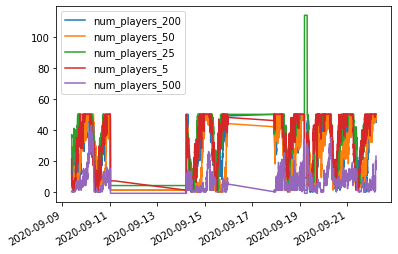

In [3]:
num_plyrs = data[['num_players_200','num_players_50','num_players_25','num_players_5','num_players_500']]
num_plyrs.plot()

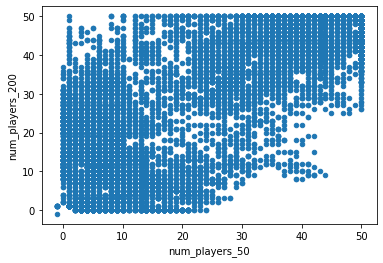

In [4]:
num_plyrs.plot.scatter(x='num_players_50',y='num_players_200')

In [11]:
hour_dummy_string = "+".join([elem for elem in hour_dummies.columns])
day_of_week_dummy_string = "+".join([elem for elem in day_of_week_dummies.columns])
result = sm.ols(formula="num_players_50 ~ num_players_5 + num_players_25 +" + \
                "num_players_500 + num_players_200 + " + hour_dummy_string + "+" + \
                "pct_flop_5 + pct_flop_25 + pct_flop_50 + pct_flop_200 + pct_flop_500 + " + \
                "avg_pot_5 + avg_pot_25 + avg_pot_50 + avg_pot_200 + avg_pot_500 + " + \
                day_of_week_dummy_string, data=data,missing="drop").fit()
# result = sm.ols(formula="num_players_50 ~ num_players_200 + " + hour_dummy_string + "+" + \
#                 day_of_week_dummy_string, data=data).fit()
print(result.params)
print(result.summary())

Intercept           4.932300
num_players_5       0.509688
num_players_25     -0.065994
num_players_500     0.184960
num_players_200     0.105960
h1                  2.637229
h10                -8.934776
h11               -11.043822
h12               -14.023453
h13               -19.447026
h14               -19.864539
h15               -21.105598
h16               -21.427975
h17               -23.640205
h18               -20.611184
h19               -17.114361
h2                  5.312648
h20                -9.803292
h21                -5.752178
h22                -3.504220
h23                -2.306763
h3                  4.502373
h4                  4.802392
h5                  7.315523
h6                  5.805664
h7                 -0.165019
h8                 -5.538805
h9                 -8.405534
pct_flop_5          0.066125
pct_flop_25         0.114993
pct_flop_50        -0.022664
pct_flop_200        0.031417
pct_flop_500        0.045333
avg_pot_5           0.009132
avg_pot_25    

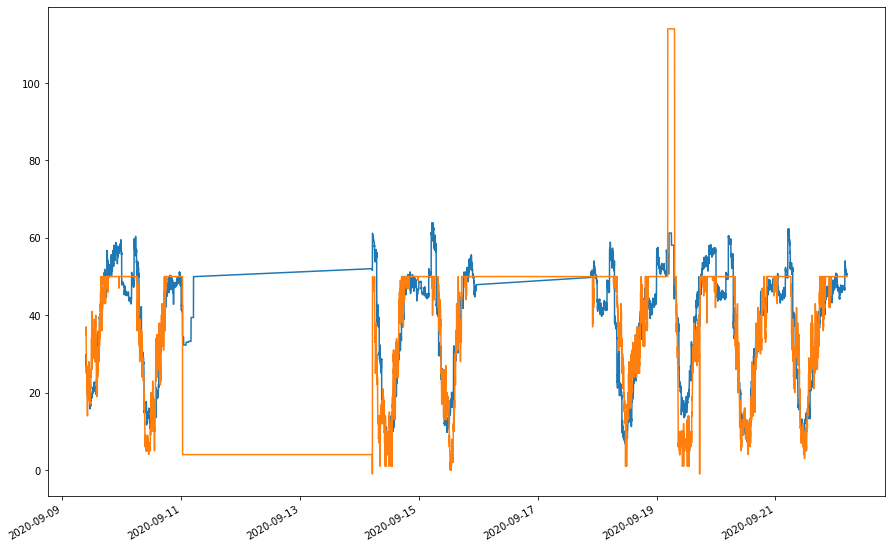

In [32]:
preds = result.predict(data)
preds[:].plot()
# data['num_players_50'][:].plot(figsize=(30,20))
data['num_players_25'][:].plot(figsize=(15,10))

In [37]:
# result.save('ols_9_21_data_500.pickle')